In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import kaepora as kpora
import kaepora_plot as kplot
import numpy as np

In [3]:
query_strings_low = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .86 and dm15_source < 1.02) or (dm15_from_fits >= .86 and dm15_from_fits < 1.02))"]
max_phase = 50.
p1 = -10.
k = 3.
p2 = p1+k
while p1 < max_phase:
    query_strings_low.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= .86 and dm15_source < 1.02) or (dm15_from_fits >= .86 and dm15_from_fits < 1.02))"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_low:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .86 and dm15_source < 1.02) or (dm15_from_fits >= .86 and dm15_from_fits < 1.02))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= .86 and dm15_source < 1.02) or (dm15_from_fits >= .86 and dm15_from_fits < 1.02))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= .86 and dm15_source < 1.02) or (dm15_from_fits >= .86 and dm15_from_fits < 1.02))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= .86 and dm15_source < 1.02) or (dm15_from_fits >= .86 and dm15_from_fits < 1.02))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1.000000 and phase < 2.000000 and ((dm15_source >= .86 and dm15_source < 1.02) or (dm15_fro

In [4]:
query_strings_high = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.02 and dm15_source < 1.18) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.18))"]
max_phase = 50.
p1 = -10.
k = 3.
p2 = p1+k
while p1 < max_phase:
    query_strings_high.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= 1.02 and dm15_source < 1.18) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.18))"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_high:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.02 and dm15_source < 1.18) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.18))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.02 and dm15_source < 1.18) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.18))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= 1.02 and dm15_source < 1.18) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.18))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= 1.02 and dm15_source < 1.18) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.18))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1.000000 and phase < 2.000000 and ((dm15_source >= 1.02 and dm15_source < 1.18) or 

In [5]:
composites_low, sn_arrays_low, boot_sn_arrays_low = kpora.make_composite(query_strings_low, boot=False, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .86 and dm15_source < 1.02) or (dm15_from_fits >= .86 and dm15_from_fits < 1.02))
20 Total Spectra found
0 flagged spectra removed 20 spectra left
0 spectra of peculiar Ias removed 20 spectra left
20 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
13 total SNe
removed spectra of SNe with A_V > 2.0
Using 20 spectra of 13 SNe
Gini balancing...
Balanced after 4 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= .86 and dm15_source < 1.02) or (dm15_from_fits >= .86 and dm15_from_fits < 1.02))
45 Total Spectra found
0 flagged spectra removed 45 spectra left
0 spectra of peculiar Ias removed 45 spectra left
40 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination

19 Total Spectra found
0 flagged spectra removed 19 spectra left
2 spectra of peculiar Ias removed 17 spectra left
17 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
15 total SNe
removed spectra of SNe with A_V > 2.0
Using 17 spectra of 15 SNe
Gini balancing...
Balanced after 8 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 29.000000 and phase < 32.000000 and ((dm15_source >= .86 and dm15_source < 1.02) or (dm15_from_fits >= .86 and dm15_from_fits < 1.02))
16 Total Spectra found
0 flagged spectra removed 16 spectra left
1 spectra of peculiar Ias removed 15 spectra left
14 spectra of SNe that have host reddening corrections
Arrays cleaned
14 spectra may have telluric contamination
13 total SNe
removed spectra of SNe with A_V > 2.0
Using 13 spectra of 12 SNe
Gini balancing...
Balanced after 6 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Event

In [6]:
composites_high, sn_arrays_high, boot_sn_arrays_high = kpora.make_composite(query_strings_high, boot=False, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.02 and dm15_source < 1.18) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.18))
44 Total Spectra found
1 flagged spectra removed 43 spectra left
0 spectra of peculiar Ias removed 43 spectra left
41 spectra of SNe that have host reddening corrections
Arrays cleaned
41 spectra may have telluric contamination
12 total SNe
removed spectra of SNe with A_V > 2.0
Using 41 spectra of 12 SNe
Gini balancing...
Balanced after 14 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.02 and dm15_source < 1.18) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.18))
65 Total Spectra found
3 flagged spectra removed 62 spectra left
0 spectra of peculiar Ias removed 62 spectra left
51 spectra of SNe that have host reddening corrections
Arrays cleaned
51 spectra may have telluric contam

42 Total Spectra found
0 flagged spectra removed 42 spectra left
0 spectra of peculiar Ias removed 42 spectra left
40 spectra of SNe that have host reddening corrections
Arrays cleaned
40 spectra may have telluric contamination
25 total SNe
removed spectra of SNe with A_V > 2.0
Using 39 spectra of 24 SNe
Gini balancing...
Balanced after 17 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 29.000000 and phase < 32.000000 and ((dm15_source >= 1.02 and dm15_source < 1.18) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.18))
34 Total Spectra found
1 flagged spectra removed 33 spectra left
0 spectra of peculiar Ias removed 33 spectra left
31 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
24 total SNe
removed spectra of SNe with A_V > 2.0
Using 31 spectra of 24 SNe
Gini balancing...
Balanced after 10 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = E

Phase:  -11.343731699898678
dm15:  0.9420367432824237
Redshift:  0.013344515082403552
Morphology:  13.717249149224726
Phase:  -8.624926599096904
dm15:  0.9318423388972473
Redshift:  0.016955796589037002
Morphology:  13.601885901759765
Phase:  -5.536029405032944
dm15:  0.9250436424106329
Redshift:  0.022087925167780412
Morphology:  13.963503396424137
Phase:  -2.8836645014058253
dm15:  0.92967926196836
Redshift:  0.016573600060703977
Morphology:  13.338567241971463
Phase:  0.9141926640202173
dm15:  0.9311029148965828
Redshift:  0.017456874721368285
Morphology:  11.718848207923012
Phase:  3.6644749258947367
dm15:  0.9399156791666469
Redshift:  0.015776333665094667
Morphology:  14.053843973750082
Phase:  6.6416801654006985
dm15:  0.9380796850789292
Redshift:  0.010877543573686152
Morphology:  12.305080587963115
Phase:  8.952606813583666
dm15:  0.9350807054591
Redshift:  0.017596055027234415
Morphology:  13.26638231746772
Phase:  12.478343554314
dm15:  0.9462639182494773
Redshift:  0.010319

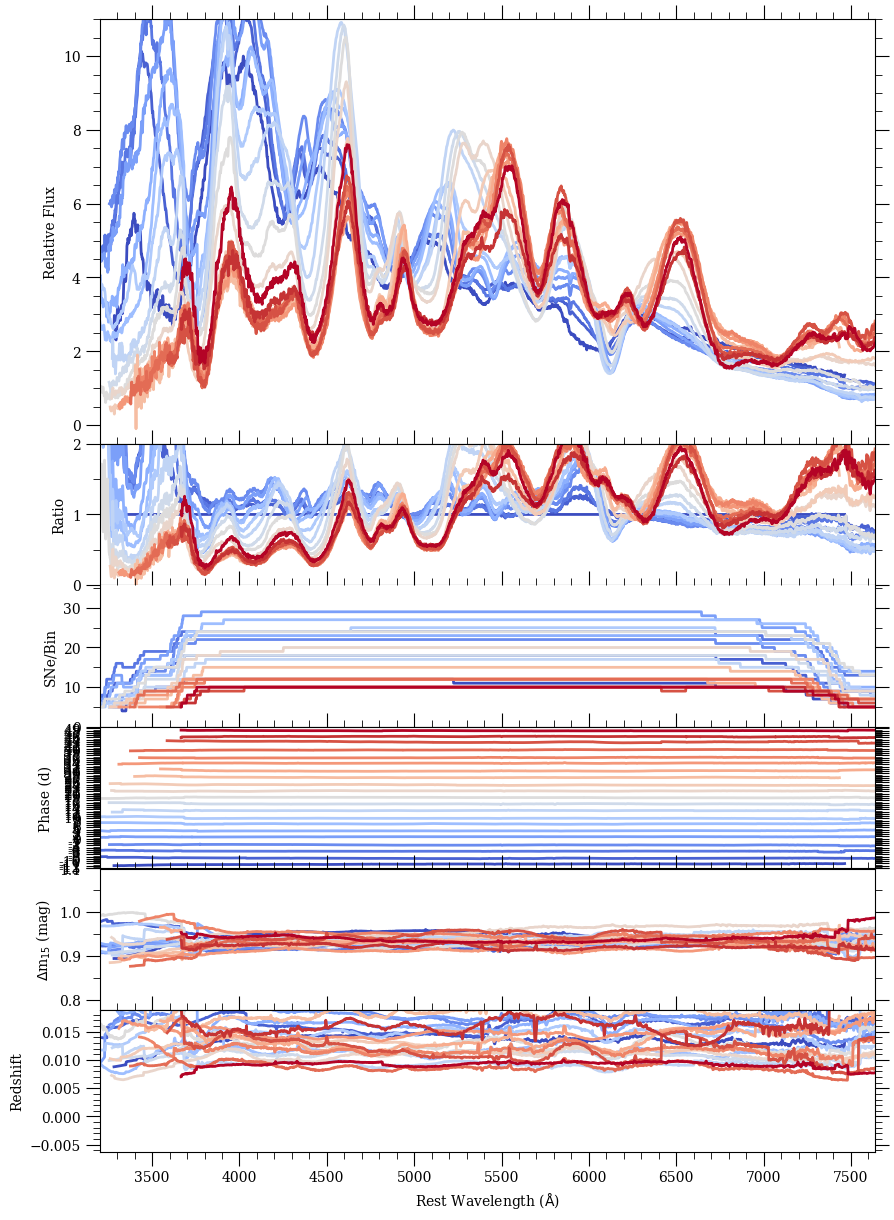

In [7]:
kpora.set_min_num_spec(composites_low, 5)
kplot.comparison_plot(composites_low, scale_type=False, min_num_show=5)

Phase:  -11.126527265292104
dm15:  1.0847601830143114
Redshift:  0.009240222277603662
Morphology:  14.655313931164795
Phase:  -8.254498824788456
dm15:  1.0931584834340342
Redshift:  0.007055630297352883
Morphology:  13.774365051988696
Phase:  -5.389117980869061
dm15:  1.086992400605643
Redshift:  0.012865734145715462
Morphology:  13.605256404647728
Phase:  -2.4160195508796924
dm15:  1.0878181178225306
Redshift:  0.01276867874324112
Morphology:  12.955816488967686
Phase:  0.39520914127282836
dm15:  1.0896876306878405
Redshift:  0.012695367073142182
Morphology:  13.064797485438664
Phase:  3.309453886049728
dm15:  1.0876615162336591
Redshift:  0.010934702554907388
Morphology:  12.362297658050473
Phase:  6.330250961250363
dm15:  1.0879524844601138
Redshift:  0.013575885921801189
Morphology:  11.880157673462005
Phase:  9.59896169305413
dm15:  1.08300050308497
Redshift:  0.012533797022173956
Morphology:  12.917927682320618
Phase:  12.323391895959778
dm15:  1.0844842746928778
Redshift:  0.012

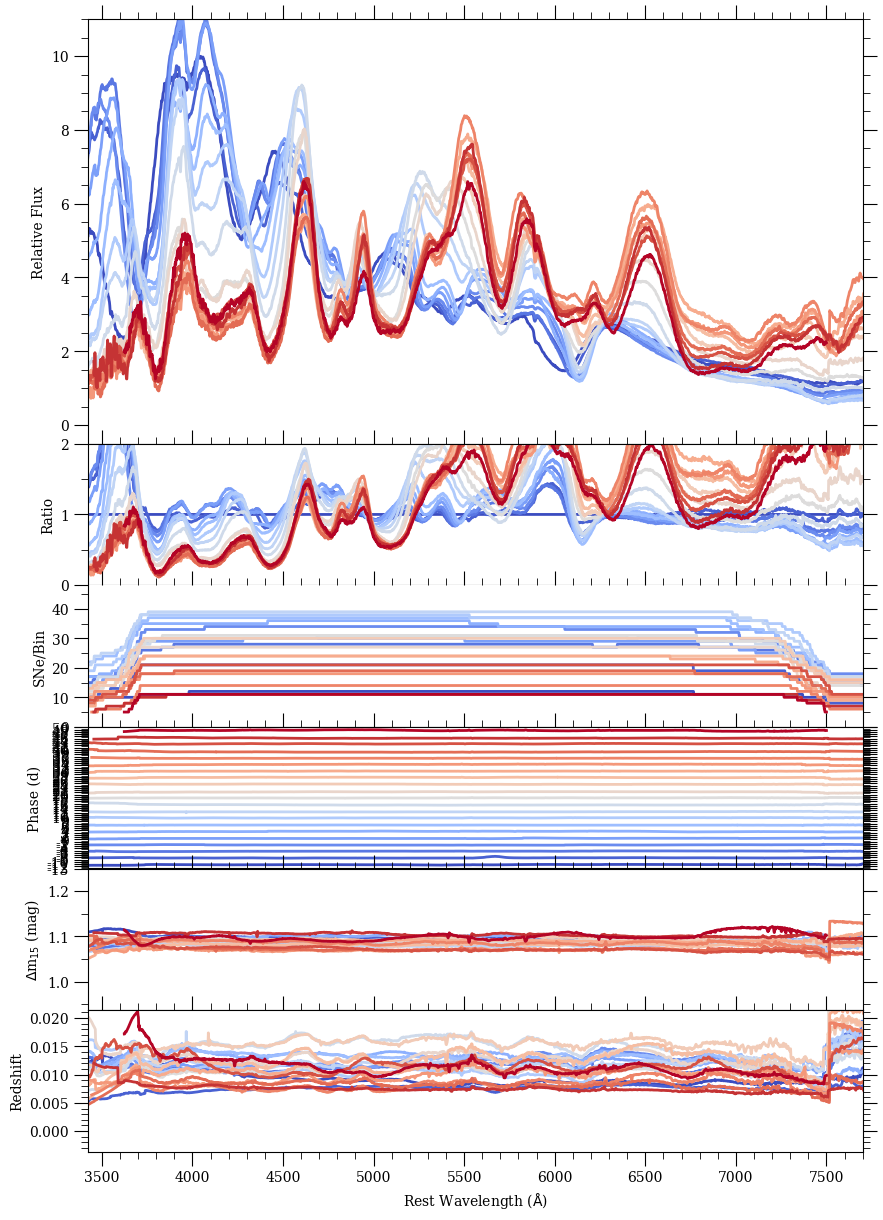

In [8]:
kpora.set_min_num_spec(composites_high, 5)
kplot.comparison_plot(composites_high, scale_type=False, min_num_show=5)

In [9]:
kpora.save_comps_to_files(composites_low, 'David_x1=1', num_avg = 5, boot=False)
kpora.save_comps_to_files(composites_high, 'David_x1=0', num_avg = 5, boot=False)

-11.34 0.94 0.013
../../David_Comps/David_x1=1_N=13_Nspec=20_phase=m11.34_dm15=0.94_z=0.013.txt
-8.62 0.93 0.017
../../David_Comps/David_x1=1_N=19_Nspec=40_phase=m8.62_dm15=0.93_z=0.017.txt
-5.54 0.93 0.022
../../David_Comps/David_x1=1_N=25_Nspec=47_phase=m5.54_dm15=0.93_z=0.022.txt
-2.88 0.93 0.017
../../David_Comps/David_x1=1_N=22_Nspec=38_phase=m2.88_dm15=0.93_z=0.017.txt
0.91 0.93 0.017
../../David_Comps/David_x1=1_N=31_Nspec=48_phase=p0.91_dm15=0.93_z=0.017.txt
3.66 0.94 0.016
../../David_Comps/David_x1=1_N=24_Nspec=46_phase=p3.66_dm15=0.94_z=0.016.txt
6.64 0.94 0.011
../../David_Comps/David_x1=1_N=27_Nspec=46_phase=p6.64_dm15=0.94_z=0.011.txt
8.95 0.94 0.018
../../David_Comps/David_x1=1_N=25_Nspec=41_phase=p8.95_dm15=0.94_z=0.018.txt
12.48 0.95 0.01
../../David_Comps/David_x1=1_N=17_Nspec=30_phase=p12.48_dm15=0.95_z=0.01.txt
15.44 0.93 0.011
../../David_Comps/David_x1=1_N=18_Nspec=28_phase=p15.44_dm15=0.93_z=0.011.txt
18.17 0.94 0.013
../../David_Comps/David_x1=1_N=24_Nspec=32_ph